## Customer Churn Analysis in a  Telco dataset



### Read dataset

##### Import libraries

In [26]:
import kagglehub
import pandas as pd
import os


## Carga y exploración inicial del dataset


### Read the dataset

In [27]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)


df = pd.read_csv(os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))


Path to dataset files: /home/juanchx/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


###  Realiza una inspección inicial del dataset:
- Identifica las columnas categóricas y numéricas.
- Verifica valores faltantes o atípicos y describe cómo los manejarás.
- Realiza un análisis estadístico básico para entender las distribuciones de las variables.

In [28]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables categóricas:", variables_categoricas)
print("Variables numéricas:", variables_numericas)

print("\n")

print("Valores unicos de las variables categoricas:")
print("\n")
#mejorar la visuaclizacion de los prints
for i in variables_categoricas:
    print(f'\033[94mValores unicos de {i}:\033[0m {df[i].unique()}, Cantidad de valores unicos: {df[i].unique().shape[0]}')

print("\n")

print("Cantidad de valores unicos en las variables numericas:")
print("\n")

for i in variables_numericas:
    print(f'\033[94mCantidad de valores unicos en {i}:\033[0m {df[i].unique().shape[0]}')


Variables categóricas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Variables numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


Valores unicos de las variables categoricas:


Valores unicos de customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'], Cantidad de valores unicos: 7043
Valores unicos de gender: ['Female' 'Male'], Cantidad de valores unicos: 2
Valores unicos de Partner: ['Yes' 'No'], Cantidad de valores unicos: 2
Valores unicos de Dependents: ['No' 'Yes'], Cantidad de valores unicos: 2
Valores unicos de PhoneService: ['No' 'Yes'], Cantidad de valores unicos: 2
Valores unicos de MultipleLines: ['No phone service' 'No' 'Yes'], Cantidad de valores unicos: 3
Valores unicos de InternetService: ['DSL'

# Hallazgos del análisis de variables (Telco Customer Churn)

- **TotalCharges (numérica)**
  - Tiene ~6,531 valores únicos y contiene números almacenados como texto (`object`).
  - Debe convertirse a tipo numérico para análisis/modelado.

- **customerID (identificador)**
  - Es un identificador único por cliente.
  - No aporta señal predictiva; debe excluirse del modelado.

- **SeniorCitizen (categórica binaria)**
  - Codificada como 0 y 1; no es una variable continua.
  - Tratarla como categórica binaria/booleana.

## Acciones recoma realizar

- **Eliminar identificador:** `customerID`
- **Convertir a numérico:** `TotalCharges` 
- **Cambiar a categorica:** `SeniorCitizen` 


In [31]:
df = df.drop('customerID', axis=1)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Actualizar lista de variables categoricas
variables_categoricas = [v for v in variables_categoricas if v != 'customerID' or v != 'TotalCharges']
variables_numericas = [v for v in variables_numericas if v != 'SeniorCitizen']
variables_categoricas.append('SeniorCitizen')
variables_numericas.append('TotalCharges')


print(variables_categoricas)
print(variables_numericas)


['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn', 'SeniorCitizen']
['tenure', 'MonthlyCharges', 'TotalCharges']


### Buscar valores faltantes, nuevamente despues de cambios realizados

In [32]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [33]:
print('porcentaje de valores faltantes de TotalCharges: ', df['TotalCharges'].isnull().sum() / df.shape[0])

porcentaje de valores faltantes de TotalCharges:  0.001561834445548772


### Al ser un porcentaje tal bajo (0.00156%) se puede tomar la decision de eliminar los valores faltantes.

In [34]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [36]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Revisar si existen valores atipicos sobre las variables numericas, a traves de IQR y boxplot

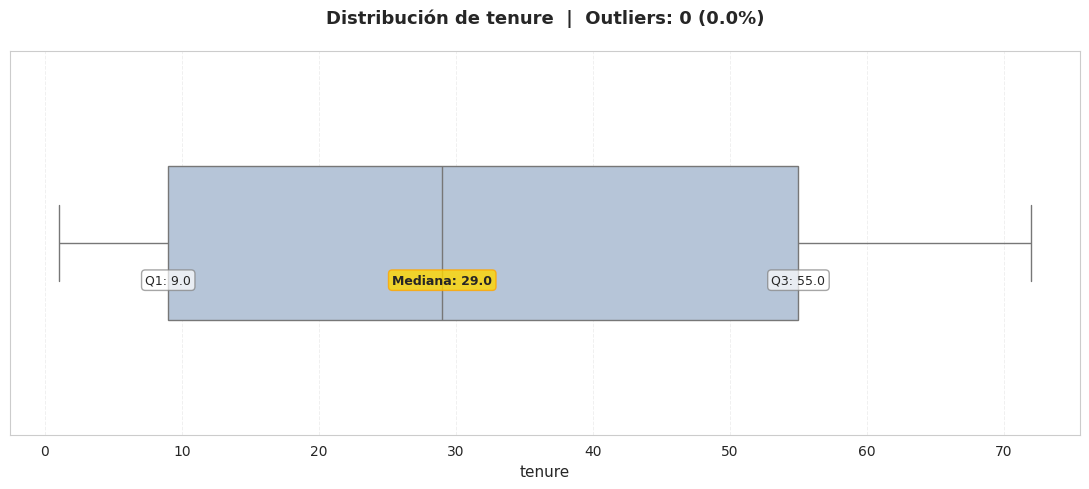

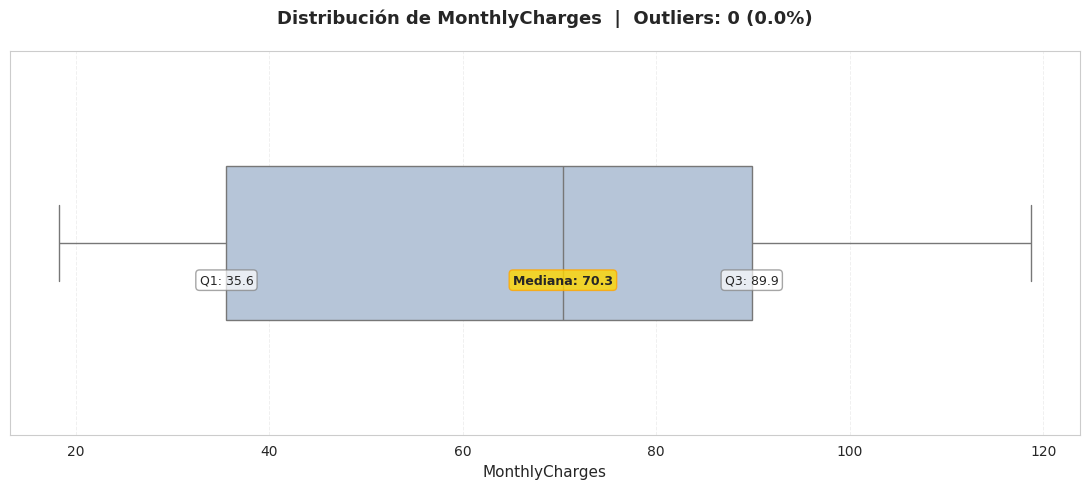

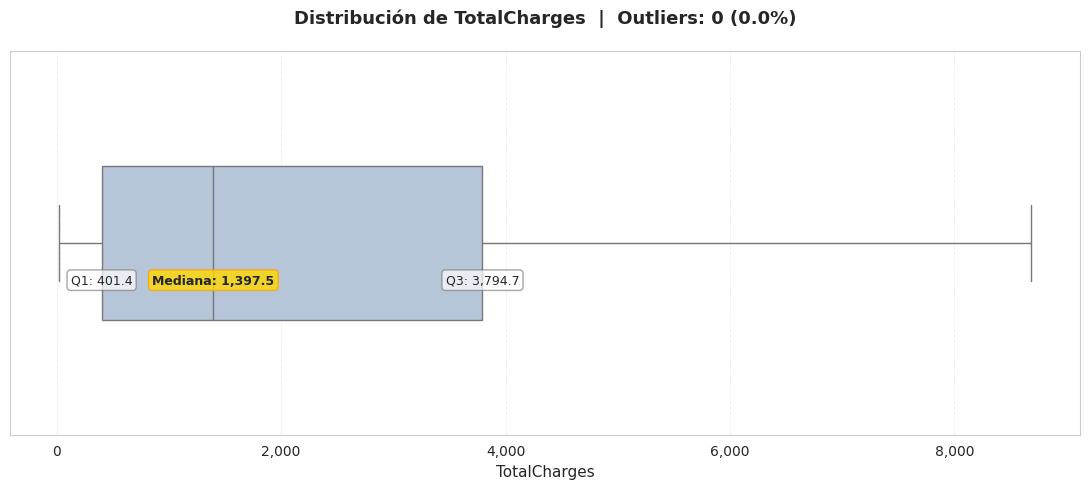

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Variables numéricas continuas (sin SeniorCitizen)
variables_numericas_continuas = [v for v in variables_numericas if v != 'SeniorCitizen']

for i in variables_numericas_continuas:
    fig, ax = plt.subplots(figsize=(11, 5))
    
    # Calcular estadísticas
    data_clean = df[i].dropna()
    Q1 = data_clean.quantile(0.25)
    Q3 = data_clean.quantile(0.75)
    median = data_clean.median()
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_clean[(data_clean < lower_bound) | (data_clean > upper_bound)]
    
    # Boxplot base
    bp = sns.boxplot(data=df, x=i, color='lightsteelblue', width=0.4, ax=ax,
                     flierprops=dict(marker='o', markerfacecolor='coral', markersize=6, 
                                     alpha=0.6, markeredgecolor='darkred', markeredgewidth=0.8))
    
    # Anotar valores clave
    y_pos = 0.08
    ax.text(Q1, y_pos, f'Q1: {Q1:,.1f}', ha='center', va='top', fontsize=9, 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.7))
    ax.text(median, y_pos, f'Mediana: {median:,.1f}', ha='center', va='top', fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='gold', edgecolor='orange', alpha=0.8))
    ax.text(Q3, y_pos, f'Q3: {Q3:,.1f}', ha='center', va='top', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.7))
    
    # Título con info de outliers
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(data_clean)) * 100
    ax.set_title(f'Distribución de {i}  |  Outliers: {n_outliers} ({pct_outliers:.1f}%)', 
                 fontsize=13, fontweight='bold', pad=20)
    ax.set_xlabel(i, fontsize=11)
    ax.set_ylabel('')
    
    # Grid y formato
    ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.7)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    plt.tight_layout()
    plt.show()

In [45]:
def detectar_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[variable] < (Q1 - 1.5 * IQR)) | (df[variable] > (Q3 + 1.5 * IQR))]

#%%
for i in variables_numericas:
    num_outliers = len(detectar_outliers(df, i))
    print(f"La variable {i} tiene {num_outliers if num_outliers == 1 else f'{num_outliers} valores'} atipicos.")

La variable tenure tiene 0 valores atipicos.
La variable MonthlyCharges tiene 0 valores atipicos.
La variable TotalCharges tiene 0 valores atipicos.
